<div style="text-align: right"><strong>Supervised Model Comparison:</strong> <span style="color:darkred">OLS, LogReg,KNN, Naive Bayes,Decision Tree, Random Forest</span> </div>

<a id="top"></a>

# <span style="color:darkblue">Gender Classification by Name</span>

__Author:__ Ryan Harper 

----

<a href='#ov'>A. Overview</a><br>
<a href='#exp'>B. Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>
<a href='#sec3'>3. Statistical Significance</a><br>

-----

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__ https://www.kaggle.com/datagov/usa-names/data

Dataset focuses on all registered names in the US by birth year, year count, and gender from 1921 until 2018. The goal of this project is to practice using different models and explore how the use of these different models may or may not be appropriate.

__Variables (health indicators):__
>__year:__ _Year the baby was born_<br>
__gender:__ _sex (1 = male; 0 = female)_ <br>
__name:__ _name of the baby_<br>
__year_count:__ _number of babies with same name for that year for a gender_

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Observations:__
>...

__Hypothesis:__ 
> Logistic Regression and Naive Bayes will be able to predict gender with the highest percentage of success pending appropriate feature design.

__Thoughts:__
>...

__Method:__
> Using multiple different models. The aim of this project is to explore how different models can handle the data (target and features) and to see what information can be gained from using multiple different models. Ultimately, the goal is to determine which models are appropriate for a binary (discrete) target with features that are both qualitative (discrete) and quantitative (ranked/continuous).

----------

<a id="sec1"></a>

# <span style="color:darkblue">Cleaning the Data</span>  <a href='#top'>(top)</a>

In [177]:
# Time assessment
import time

# Data processing
import pandas as pd
import matplotlib.pyplot as plt
import plotly as plo
import seaborn as sns
import numpy as np

# Preparing Models
from sklearn.model_selection import train_test_split

# Model - Linear Regression
from sklearn import linear_model

# Model K Nearest Neigbor
from sklearn.neighbors import KNeighborsClassifier

# Model - Decision Tree
from sklearn import tree

# Decision Tree Visualization
from IPython.display import Image
import pydotplus
import graphviz

# Ensemble - Random Forest
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [178]:
# Import data
names = pd.read_csv('../data/usnames/names_per_year.csv')
del names['Unnamed: 0']
names.gender = names['gender'].apply(lambda val: 0 if val == 'F' else 1)

In [179]:
names.sample(3)

,year,gender,name,year_total
466087,1986,1,Dallas,513
319552,2004,0,Quetzali,5
322026,1973,0,Shakisha,5


In [180]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613845 entries, 0 to 613844
Data columns (total 4 columns):
year          613845 non-null int64
gender        613845 non-null int64
name          613845 non-null object
year_total    613845 non-null int64
dtypes: int64(3), object(1)
memory usage: 18.7+ MB


In [174]:
names.isnull().values.any()

False

In [139]:
def vowelcheck(value):
    string=value.lower()
    vowels=0
    for i in string:
          if(i=='a' or i=='e' or i=='i' or i=='o' or i=='u'):
                vowels=vowels+1
    return vowels/len(string)

def consonantcluster(value):
    string=value.lower()
    end = len(string) - 1
    cc = 0
    for i, val in enumerate(string):
        if (i != end) and not (val=='a' or val=='e' or val=='i' or val=='o' or val=='u'):
                if string[i] == string[i+1]:
                    cc = cc + 1
                    
    return cc

def ycount(value):
    string=value.lower()
    y=0
    for i in string:
          if(i=='y'):
                y=y+1
    return y

def fvowel(value):
    string=value.lower()
    val = string[0]
    if (val=='a' or val=='e' or val=='i' or val=='o' or val=='u'):
        return 1
    else:
        return 0
    
def lcons(value):
    string=value.lower()
    val = string[-1]
    if (val=='a' or val=='e' or val=='i' or val=='o' or val=='u'):
        return 1
    else:
        return 0
    
def rareletters(value):
    string=value.lower()
    rare=0
    for i in string:
          if(i=='z' or i=='x' or i=='q'):
                return 1
    return 0

In [140]:
names['len'] = names['name'].apply(lambda x: len(x))
names['vowelp'] = names['name'].apply(vowelcheck)
names['cc'] = names['name'].apply(consonantcluster)
names['yc'] = names['name'].apply(ycount)
names['fvowel'] = names['name'].apply(fvowel)
names['lcons'] = names['name'].apply(lcons)
names['rareletters'] = names['name'].apply(rareletters)

In [141]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613845 entries, 0 to 613844
Data columns (total 11 columns):
year           613845 non-null int64
gender         613845 non-null int64
name           613845 non-null object
year_total     613845 non-null int64
len            613845 non-null int64
vowelp         613845 non-null float64
cc             613845 non-null int64
yc             613845 non-null int64
fvowel         613845 non-null int64
lcons          613845 non-null int64
rareletters    613845 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 51.5+ MB


In [175]:
names.sample(3)

,year,gender,name,year_total
164752,1972,0,Kellye,16
541266,1964,1,Donovan,45
317134,1978,0,Michaela,134


<a id="sec2"></a>

# <span style="color:darkblue">Exploring the Data</span>  <a href='#top'>(top)</a>

In [143]:
(names.gender * names.lcons).sum()

75135

In [153]:
vowelp = names.groupby(['year']).mean()

In [154]:
vowelp = vowelp['vowelp']

In [155]:
vowelp.head()

year
1910    0.440255
1911    0.437689
1912    0.433882
1913    0.433576
1914    0.432827
Name: vowelp, dtype: float64

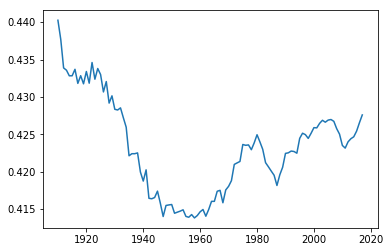

In [158]:
plt.plot(vowelp.index,vowelp)
plt.show()

Pearson corellation(linear) vs Rank Correlation Score(nonparametric)<br>
Explore relationship between year and other features

Check correllation between features

In [176]:
# feature data for models
features = names.copy()
features.head()
features = features.sample(frac=1.0)

y = features['gender'].values.reshape(-1, 1)
X = features[['year', 'len', 'year_total','vowelp', 'cc', 'yc', 'fvowel','lcons','rareletters']]

print(np.shape(y))
print(np.shape(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)  

KeyError: "['len' 'vowelp' 'cc' 'yc' 'fvowel' 'lcons' 'rareletters'] not in index"

## 1. Linear Regression (Ordinary Least Squares)

_1. Target is binary so this model may not be appropriate_

_2. Many features are binary so model may not be appropriate_

In [55]:
%%time
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# Display the attributes
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[-0.00070023 -0.01135693 -0.35655556 -0.12818477 -0.23905148  0.01944348
  -0.39574586 -0.00220904]]
Intercept: 
 [2.30818148]


In [117]:
coef = list(zip(['year', 'len', 'vowelp', 'cc', 'yc', 'fvowel','lcons','rareletters'],regr.coef_[0]))

In [57]:
predY = regr.predict(X_test)

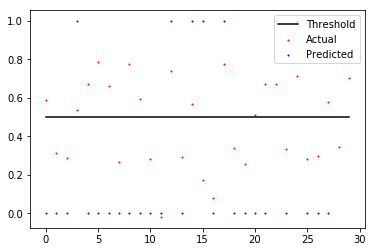

In [58]:
x = list(range(len(y_test[0:30])))
y =[0.5]*len(y_test[0:30])

plt.scatter(range(len(y_test[0:30])),predY[0:30],c='red',s=1)
plt.scatter(range(len(y_test[0:30])),y_test[0:30],c='blue',s=1)
plt.plot(x,y,c='black')
plt.legend(['Threshold','Actual','Predicted'],loc='upper right')
plt.show()

In [59]:
# score is low because of approximate values with lin regression - values need to be rounded
regr.score(X_test,y_test)

0.20739706364595212

In [60]:
# create vectorizer function for numpy
vfunc =  np.vectorize(lambda val: int(round(abs(val))))

# create final copy
final = X_test.copy()
final['gender'] = y_test
final['guessval'] = vfunc(regr.predict(X_test).ravel())

In [61]:
final.index.name = 'index'
names.index.name = 'index'
final = final.join(names['name'], how='left', on='index')

In [63]:
print('{0:f}% of names were correctly identified by gender'.format(100*len(final.loc[final['gender'] == final['guessval']]) / len(final)))

71.912638% of names were correctly identified by gender


## 2. K Nearest Neighbors

In [85]:
%%time
neighbors = KNeighborsClassifier(n_neighbors=5)
neighbors.fit(X_train, y_train.ravel())

CPU times: user 7.32 s, sys: 34.5 ms, total: 7.35 s
Wall time: 7.35 s


In [126]:
print(neighbors.score(X_test,y_test))

0.6826134648174897


## 3. Decision Tree

In [103]:
%%time

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=3)

decision_tree.fit(X_train, y_train)

CPU times: user 124 ms, sys: 109 ms, total: 234 ms
Wall time: 424 ms


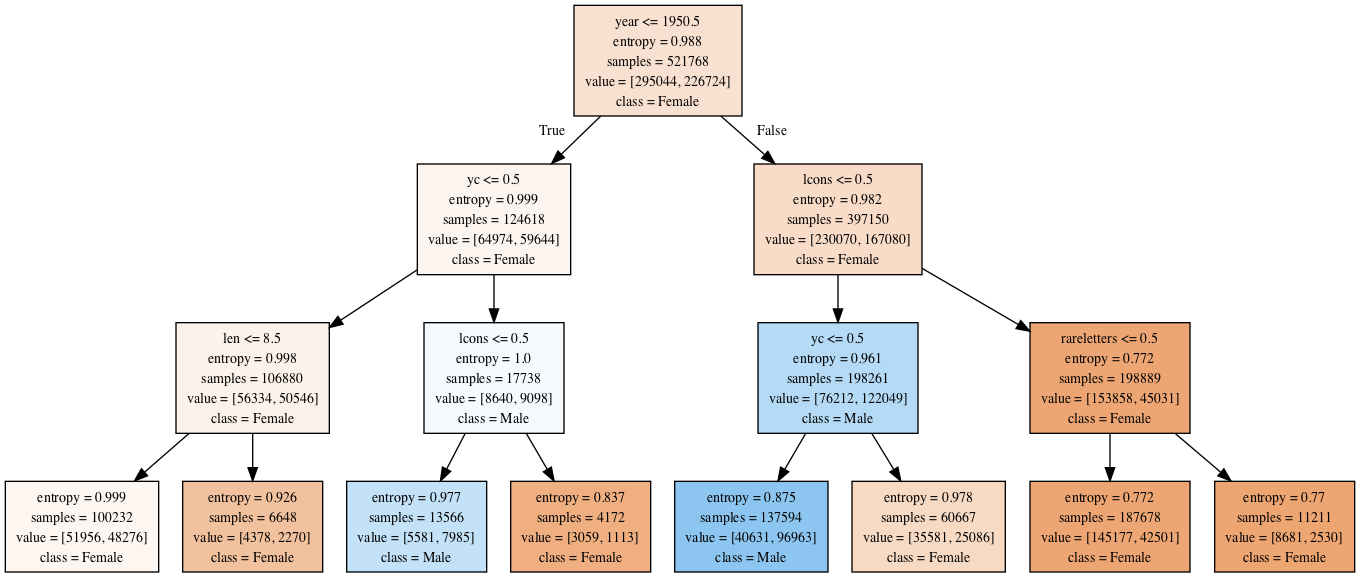

In [104]:
# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=['year', 'len', 'vowelp', 'cc', 'yc', 'fvowel','lcons','rareletters'],
    class_names=['Female', 'Male'],
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [105]:
decision_tree.score(X_test,y_test)

0.6779217394137516

## 4. Random Forest

In [124]:
%%time
yForest = features['gender'].values.reshape(-1, 1)
XForest = features[['year', 'len', 'vowelp', 'cc', 'yc', 'fvowel','lcons','rareletters']]

rfc = ensemble.RandomForestClassifier(n_estimators=20)
rfc.fit(XForest,yForest.ravel())

CPU times: user 13 s, sys: 601 ms, total: 13.6 s
Wall time: 17.3 s


In [125]:
cross_val_score(rfc, XForest, yForest.ravel(), cv=5)

array([0.72105563, 0.72166426, 0.72214484, 0.72285349, 0.72029356])

In [114]:
rfc.feature_importances_

array([0.13726968, 0.068867  , 0.20642087, 0.04349999, 0.06028503,
       0.01879128, 0.45434124, 0.01052492])

In [118]:
importance = list(zip(['year', 'len', 'vowelp', 'cc', 'yc', 'fvowel','lcons','rareletters'],rfc.feature_importances_))

In [121]:
from pprint import pprint

In [122]:
pprint(coef)
pprint(importance)

[('year', -0.0007002326389413538),
 ('len', -0.011356925167338829),
 ('vowelp', -0.35655555660988136),
 ('cc', -0.12818476723708128),
 ('yc', -0.2390514753449296),
 ('fvowel', 0.0194434819660144),
 ('lcons', -0.39574585765690057),
 ('rareletters', -0.002209043430672203)]
[('year', 0.13726967683592256),
 ('len', 0.06886699787239789),
 ('vowelp', 0.20642086887908193),
 ('cc', 0.043499987198288306),
 ('yc', 0.06028502625213211),
 ('fvowel', 0.018791282481333865),
 ('lcons', 0.4543412435065351),
 ('rareletters', 0.01052491697430827)]


In [123]:
dir(rfc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',